In [1]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip/

--2021-10-05 14:34:35--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip/
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2021-10-05 14:34:35--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86181499d6b9f6888dc3acaead.dl.dropboxusercontent.com/cd/0/inline/BXdFKaOYrnANd3VgXc0D1qCOCUCtkt3mr-LzaXmfSOJ8px1FY75LG7kGMmj3VNL1bQNWmPuhxYse_V2e7x44X0HQGFG-AiCIyc05Vj7t18NESjy31lJf9j8Xup427hxOew5AI9_Ov26a3ebgJ55-LEXY/file# [following]
--2021-10-05 14:34:36--  https://uc86181499d6b9f6888dc3acaead.dl.dropboxusercontent.com/cd/0/inline/BXdFKaOYrnANd3VgXc0D1qCOCUCtkt3mr-LzaXmfSOJ8px1FY75LG7kGMmj3VNL1bQNWmPuhxYse_V2e7x4

In [2]:
!unzip -q "index.html"

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2, EfficientNetB3

tf.random.set_seed(2345)

In [4]:
train_path = Path("fruits-360", "Training")
test_path = Path("fruits-360", "Test")

In [5]:
train_image_path = train_path.glob("*/*")
train_image_path = list(map(lambda x: str(x), train_image_path))
train_image_path[:10]

['fruits-360/Training/Tomato not Ripened/r_268_100.jpg',
 'fruits-360/Training/Tomato not Ripened/r_163_100.jpg',
 'fruits-360/Training/Tomato not Ripened/55_100.jpg',
 'fruits-360/Training/Tomato not Ripened/r_117_100.jpg',
 'fruits-360/Training/Tomato not Ripened/276_100.jpg',
 'fruits-360/Training/Tomato not Ripened/186_100.jpg',
 'fruits-360/Training/Tomato not Ripened/103_100.jpg',
 'fruits-360/Training/Tomato not Ripened/r_196_100.jpg',
 'fruits-360/Training/Tomato not Ripened/r_36_100.jpg',
 'fruits-360/Training/Tomato not Ripened/r_150_100.jpg']

In [6]:
def get_label(image_path):
    return image_path.split("/")[-2]

train_image_label = list(map(lambda x: get_label(x), train_image_path))
train_image_label[:10]

['Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened']

In [7]:
le = LabelEncoder()
train_image_label = le.fit_transform(train_image_label)
train_image_label[:10]

array([128, 128, 128, 128, 128, 128, 128, 128, 128, 128])

In [8]:
train_image_label = tf.keras.utils.to_categorical(train_image_label)
train_image_label[:10]

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(train_image_path, train_image_label)

In [10]:
X_train[:5], y_train[:5]

(['fruits-360/Training/Salak/r_113_100.jpg',
  'fruits-360/Training/Pear Monster/315_100.jpg',
  'fruits-360/Training/Apple Red Yellow 2/5_100.jpg',
  'fruits-360/Training/Grape White 3/108_100.jpg',
  'fruits-360/Training/Grape Pink/r_212_100.jpg'],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [52]:
def load(image, label = None):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    
    if label != None:
      return image, label
    else:
      return image

In [12]:
image_size = 224
batch_size = 32

resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(height = image_size,
                                                        width = image_size)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(factor = 0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(path, label, training = True):
    image_path = tf.convert_to_tensor(path)
    image_label = tf.convert_to_tensor(label)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_path)
    label_dataset = tf.data.Dataset.from_tensor_slices(image_label)

    fruits_dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

    fruits_dataset = fruits_dataset.map(lambda image, label: load(image, label))
    fruits_dataset = fruits_dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
    fruits_dataset = fruits_dataset.shuffle(1000)
    fruits_dataset = fruits_dataset.batch(batch_size)

    if training:
        fruits_dataset = fruits_dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = AUTOTUNE)

    fruits_dataset = fruits_dataset.repeat()
    return fruits_dataset


In [14]:
train_dataset = get_dataset(X_train, y_train)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Pear 2


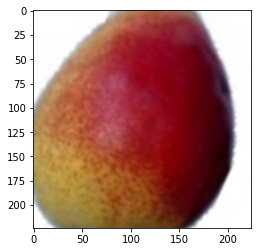

In [15]:
print(le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [16]:
val_dataset = get_dataset(X_val, y_val, training = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Salak


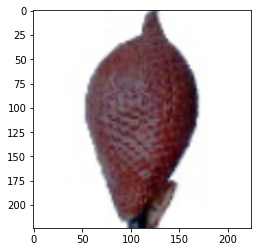

In [17]:
print(le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [18]:
backbone = ResNet50V2(
    input_shape = (224, 224, 3),
    include_top = False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation = "softmax")
])

model.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [19]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy", tf.keras.metrics.Precision(name = "precision"), tf.keras.metrics.Recall(name = "recall")]
)

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch = len(X_train)//batch_size,
    epochs = 1,
    validation_data = val_dataset,
    validation_steps = len(X_val)//batch_size)

1586/1586 [==============================] - 1101s 667ms/step - loss: 0.4535 - accuracy: 0.8730 - precision: 0.9331 - recall: 0.8383 - val_loss: 3.2227 - val_accuracy: 0.4560 - val_precision: 0.4955 - val_recall: 0.4276


In [20]:
model.layers[0].trainable = False

In [21]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", 
                                                verbose = 1,
                                                save_best_only = True,
                                                save_weights_only = True)

early_stop = tf.keras.callbacks.EarlyStopping(patience = 4)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               268419    
Total params: 23,833,219
Trainable params: 268,419
Non-trainable params: 23,564,800
_________________________________________________________________


In [25]:
history = model.fit(
    train_dataset,
    steps_per_epoch = len(X_train)//batch_size,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(X_val)//batch_size
)

Epoch 1/8
1586/1586 [==============================] - 1111s 675ms/step - loss: 0.4394 - accuracy: 0.8766 - precision: 0.9360 - recall: 0.8421 - val_loss: 3.8090 - val_accuracy: 0.4962 - val_precision: 0.5348 - val_recall: 0.4708

Epoch 00001: val_loss improved from inf to 3.80900, saving model to best_weights.h5
Epoch 2/8
1586/1586 [==============================] - 1073s 675ms/step - loss: 0.0831 - accuracy: 0.9746 - precision: 0.9773 - recall: 0.9717 - val_loss: 1.4002 - val_accuracy: 0.7096 - val_precision: 0.7447 - val_recall: 0.6887

Epoch 00002: val_loss improved from 3.80900 to 1.40015, saving model to best_weights.h5
Epoch 3/8
1586/1586 [==============================] - 1071s 676ms/step - loss: 0.0639 - accuracy: 0.9804 - precision: 0.9824 - recall: 0.9785 - val_loss: 5.7376 - val_accuracy: 0.3929 - val_precision: 0.4220 - val_recall: 0.3774

Epoch 00003: val_loss did not improve from 1.40015
Epoch 4/8
1586/1586 [==============================] - 1070s 675ms/step - loss: 0.04

In [31]:
model.save("fruits_model.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = tf.keras.models.load_model("fruits_model.h5")

OSError: ignored

In [34]:
test_image_path = list(map(lambda x: str(x), list(test_path.glob("*/*"))))
test_labels = list(map(lambda x: get_label(x), test_image_path))

In [35]:
test_labels

['Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato not Ripened',
 'Tomato no

In [43]:
test_image_path = list(map(lambda x: str(x), list(test_path.glob("*/*"))))
test_labels = list(map(lambda x: get_label(x), test_image_path))

test_labels = le.fit_transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_path = tf.convert_to_tensor(test_image_path)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_path, test_labels))
    .map(decode_image)
    .batch(batch_size)
)

In [44]:
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Tomato not Ripened


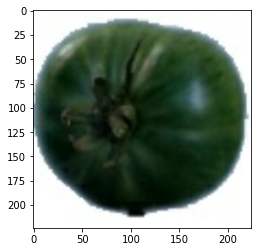

In [45]:
print(le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [46]:
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 137s 193ms/step - loss: 3.6110 - accuracy: 0.5120 - precision: 0.5320 - recall: 0.4967
 Testing Acc :  0.5119886994361877
 Testing Precision  0.5320334434509277
 Testing Recall  0.49669429659843445


In [54]:
def load_image(image_path):
    image = load(image_path)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0)
    return image

def real_time_prediction(image_path, model, encoder_method):
    image = load_image(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction, axis = 1)
    return encoder_method.inverse_transform(prediction)[0]

'Apple Braeburn'

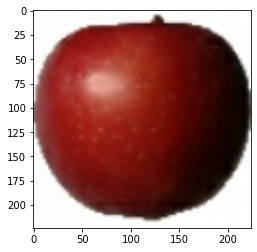

In [55]:
real_time_prediction("/content/fruits-360/Training/Apple Braeburn/100_100.jpg" , model , le)

EFFICIENTNET

In [2]:
backbone_ef = EfficientNetB3(
    input_shape = (224, 224, 3),
    include_top = False
)

model_ef = tf.keras.Sequential([
    backbone_ef,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(131, activation = "softmax")
])

model_ef.summary()

NameError: ignored

In [59]:
model_ef.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy", tf.keras.metrics.Precision(name = "precision"), tf.keras.metrics.Recall(name = "recall")]
)

In [1]:
history_ef = model_ef.fit(
    train_dataset,
    steps_per_epoch = len(X_train)//batch_size,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(X_val)//batch_size
)

NameError: ignored